In [1]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
df = pd.read_excel("C:\\Users\\Lenovo\\Downloads\\decision_play.xlsx",index_col=False)
df.head()

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Week,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Week,Yes
3,Rain,Mild,High,Week,Yes
4,Rain,Cool,Normal,Week,Yes


### `LABEL ENCODING`

In [3]:
Outlook = LabelEncoder()
df['Outlook'] = Outlook.fit_transform(df['Outlook'])

In [4]:
Temp = LabelEncoder()
df['Temp'] = Temp.fit_transform(df['Temp'])

In [5]:
Humidity = LabelEncoder()
df['Humidity'] = Humidity.fit_transform(df['Humidity'])

In [6]:
Wind = LabelEncoder()
df['Wind'] = Wind.fit_transform(df['Wind'])

In [7]:
PlayTennis = LabelEncoder()
df['PlayTennis'] = PlayTennis.fit_transform(df['PlayTennis'])

In [8]:
df.head()

,Outlook,Temp,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [9]:
X = df.drop(['PlayTennis'],axis=1)
y = df['PlayTennis']

In [10]:
#done by me
from sklearn.tree import DecisionTreeClassifier as Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
model = Model()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6666666666666666

In [11]:
# Create decison tree classifier object
clf = Model(criterion = 'entropy')

# Train decision tree classifier
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# by default, decision tree classifier uses gini index

In [12]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6666666666666666


In [13]:
clf.predict([[2,1,0,1]])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

[Text(0.3333333333333333, 0.9, 'x[0] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.16666666666666666, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5, 0.3, 'x[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

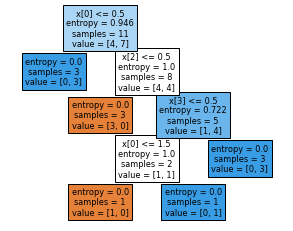

In [14]:
plt.figure(figsize=(5,4))
tree.plot_tree(clf,filled=True)

### `Second dataset`

In [15]:
df1 = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\diabetes (1).csv",index_col=False)
df1.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
XX = df1.drop(['label'],axis=1)
yy = df1['label']

In [17]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.2, random_state = 10)

### PRE PRUNING

In [18]:
# Create decison tree classifier object
clf1 = Model(criterion = 'entropy',max_depth = 2)

# Train decision tree classifier
clf1 = clf1.fit(XX_train,yy_train)

# Predict the response for test dataset
yy_pred = clf1.predict(XX_test)

# by default, decision tree classifier uses gini index

In [19]:
print("Accuracy:", metrics.accuracy_score(yy_test,yy_pred))

Accuracy: 0.6883116883116883


[Text(0.5, 0.8333333333333334, 'x[1] <= 154.5\nentropy = 0.925\nsamples = 614\nvalue = [405, 209]'),
 Text(0.25, 0.5, 'x[5] <= 26.35\nentropy = 0.806\nsamples = 511\nvalue = [385, 126]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.121\nsamples = 122\nvalue = [120, 2]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.903\nsamples = 389\nvalue = [265, 124]'),
 Text(0.75, 0.5, 'x[4] <= 544.0\nentropy = 0.71\nsamples = 103\nvalue = [20, 83]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.666\nsamples = 98\nvalue = [17, 81]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.971\nsamples = 5\nvalue = [3, 2]')]

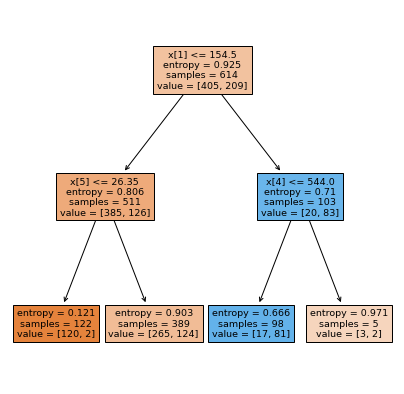

In [20]:
plt.figure(figsize=(7,7))
tree.plot_tree(clf1,filled=True)

### POST PRUNING

In [38]:
# Create decison tree classifier object
clf2 = Model(criterion = 'entropy', ccp_alpha = 0.02)

# Train decision tree classifier
clf2 = clf2.fit(XX_train,yy_train)

# Predict the response for test dataset
yy_pred = clf2.predict(XX_test)

# by default, decision tree classifier uses gini index

[Text(0.5, 0.9, 'x[1] <= 154.5\nentropy = 0.925\nsamples = 614\nvalue = [405, 209]'),
 Text(0.3333333333333333, 0.7, 'x[5] <= 26.35\nentropy = 0.806\nsamples = 511\nvalue = [385, 126]'),
 Text(0.16666666666666666, 0.5, 'entropy = 0.121\nsamples = 122\nvalue = [120, 2]'),
 Text(0.5, 0.5, 'x[7] <= 30.5\nentropy = 0.903\nsamples = 389\nvalue = [265, 124]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.718\nsamples = 217\nvalue = [174, 43]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 99.5\nentropy = 0.998\nsamples = 172\nvalue = [91, 81]'),
 Text(0.5, 0.1, 'entropy = 0.661\nsamples = 35\nvalue = [29, 6]'),
 Text(0.8333333333333334, 0.1, 'entropy = 0.993\nsamples = 137\nvalue = [62, 75]'),
 Text(0.6666666666666666, 0.7, 'entropy = 0.71\nsamples = 103\nvalue = [20, 83]')]

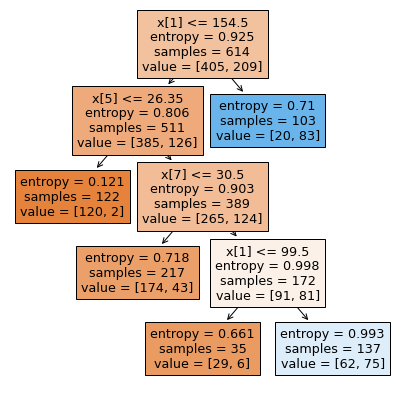

In [39]:
plt.figure(figsize=(7,7))
tree.plot_tree(clf2,filled=True)